#### Step 1: Setting Up the Environment
First, ensure you have the necessary libraries installed. You can install them using pip if you haven't already:

#### Step 2: Importing Libraries
We import the necessary libraries to perform the analysis:
* networkx for network creation and analysis.
* matplotlib.pyplot for plotting the network.
* pandas for handling and displaying data in a structured format.

In [2]:
# pip install networkx matplotlib pandas

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

#### Step 3: Loading the Dataset
The Davis Southern Women dataset is a classic bipartite network dataset that captures the attendance of 18 Southern women at 14 social events. In this step, we load the dataset using NetworkX’s built-in function, davis_southern_women_graph(). This function returns a bipartite graph where nodes represent either women or events, and edges represent attendance. We then extract the two sets of nodes: one for the women and one for the events. This separation is crucial because it allows us to analyze the relationships within each group separately, as well as the interactions between the two groups.

In [6]:
# Load the Davis Southern Women dataset
G = nx.davis_southern_women_graph()

# Extract the bipartite sets
women = {n for n, d in G.nodes(data=True) if d['bipartite'] == 0}
events = set(G) - women

# Convert to lists for easier handling
women = list(women)
events = list(events)

#### Step 4: Visualizing the Bipartite Graph
Visualization is a powerful tool for understanding the structure of a network. In this step, we create a bipartite graph visualization using NetworkX’s bipartite_layout function, which positions the women nodes on one side and the event nodes on the other. By drawing the graph with matplotlib, we can see how women and events are connected. This visualization provides an intuitive overview of the dataset, highlighting which women attended which events and revealing potential patterns or clusters in the data.

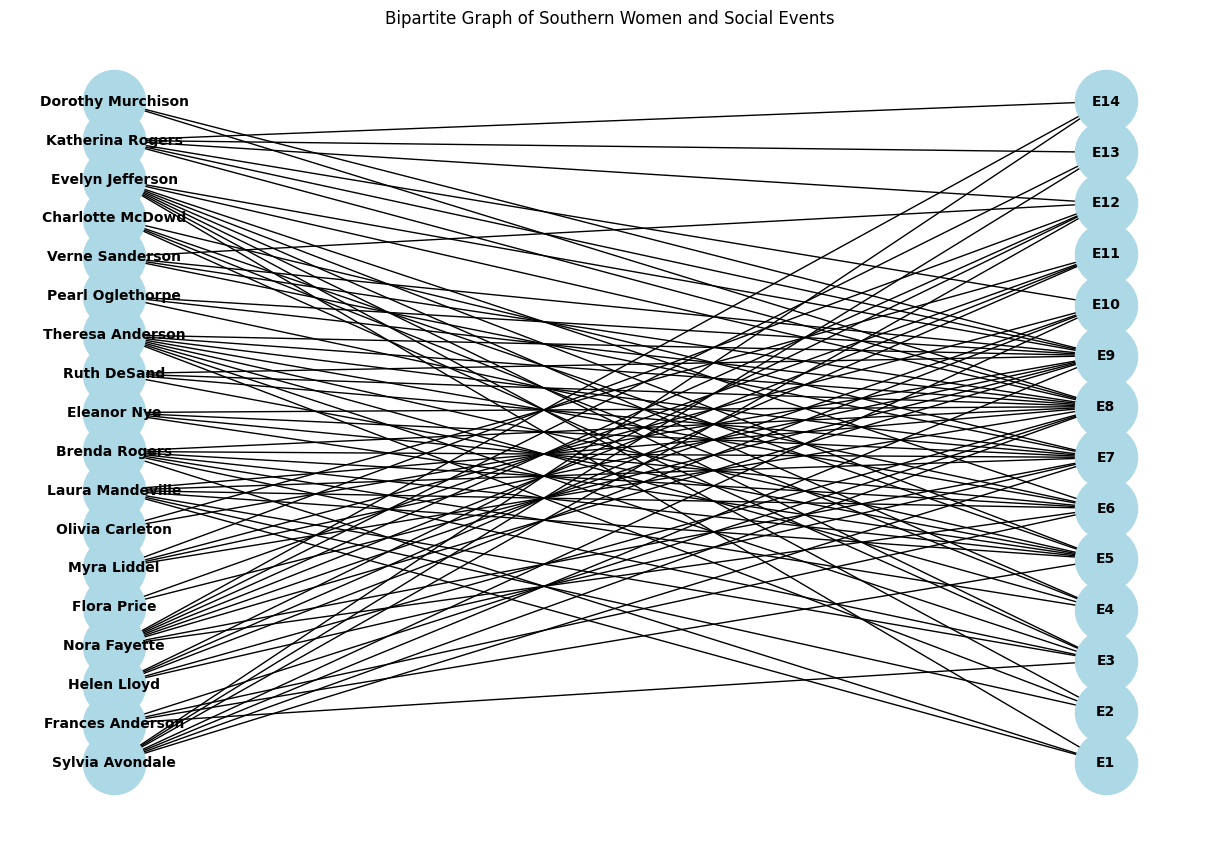

In [7]:
# Position the nodes on the left (women) and right (events)
pos = nx.bipartite_layout(G, women)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')
plt.title("Bipartite Graph of Southern Women and Social Events")
plt.show()

The output of this step is the visualization of the bipartite graph using matplotlib. The graph clearly shows the women nodes on one side and the event nodes on the other, with edges connecting women to the events they attended. The visualization provides an intuitive representation of the dataset, highlighting which women attended which events. The graph reveals patterns such as clusters of women who attended similar events, as well as events that were more popular among the women. This visual output is crucial for understanding the structure and dynamics of the network.

#### Step 5: Analyzing Relationships Between Women
To analyze the relationships between the women, we project the bipartite graph onto the women nodes. This projection creates a new graph where two women are connected if they attended at least one common event. By visualizing this projected graph, we can identify which women are closely connected based on their shared event attendance. This step helps us understand the social structure among the women, revealing potential friendships, cliques, or social circles.



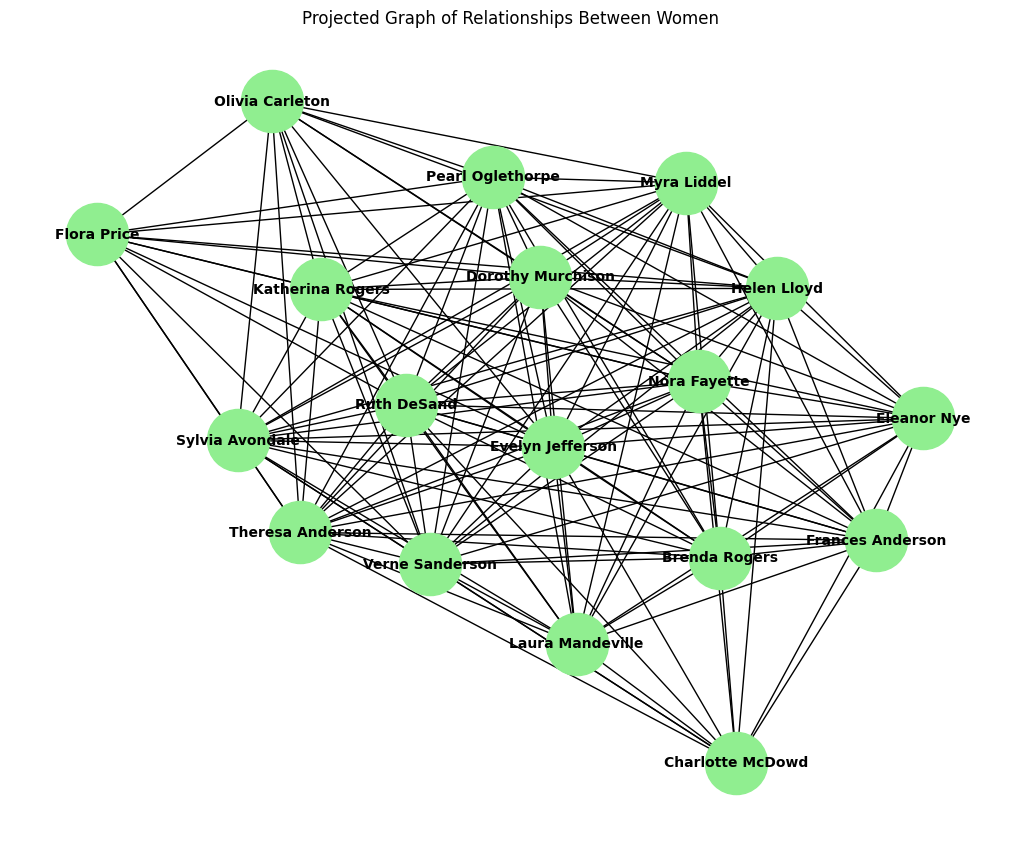

In [8]:
# Project the bipartite graph onto the women nodes
women_graph = nx.bipartite.projected_graph(G, women)

# Draw the projected graph
plt.figure(figsize=(10, 8))
nx.draw(women_graph, with_labels=True, node_color='lightgreen', node_size=2000, font_size=10, font_weight='bold')
plt.title("Projected Graph of Relationships Between Women")
plt.show()

The output of this step is the analysis of the network's structure and properties. By examining the bipartite graph, we can identify key nodes (women or events) that are central to the network. For example, some women may have attended many events, making them central figures in the social network, while some events may have been attended by many women, indicating their popularity. The graph also allows us to identify potential communities or clusters within the network, such as groups of women who frequently attended the same events. These insights are derived directly from the visual output and provide a deeper understanding of the social dynamics captured in the dataset.

#### Step 6: Analyzing Relationships Between Events
Similarly, we can analyze the relationships between events by projecting the bipartite graph onto the event nodes. In this projection, two events are connected if they were attended by at least one common woman. Visualizing this graph helps us understand which events are similar based on their attendee overlap. This analysis can reveal patterns in event participation, such as whether certain events tend to attract the same group of women or if there are distinct clusters of events.

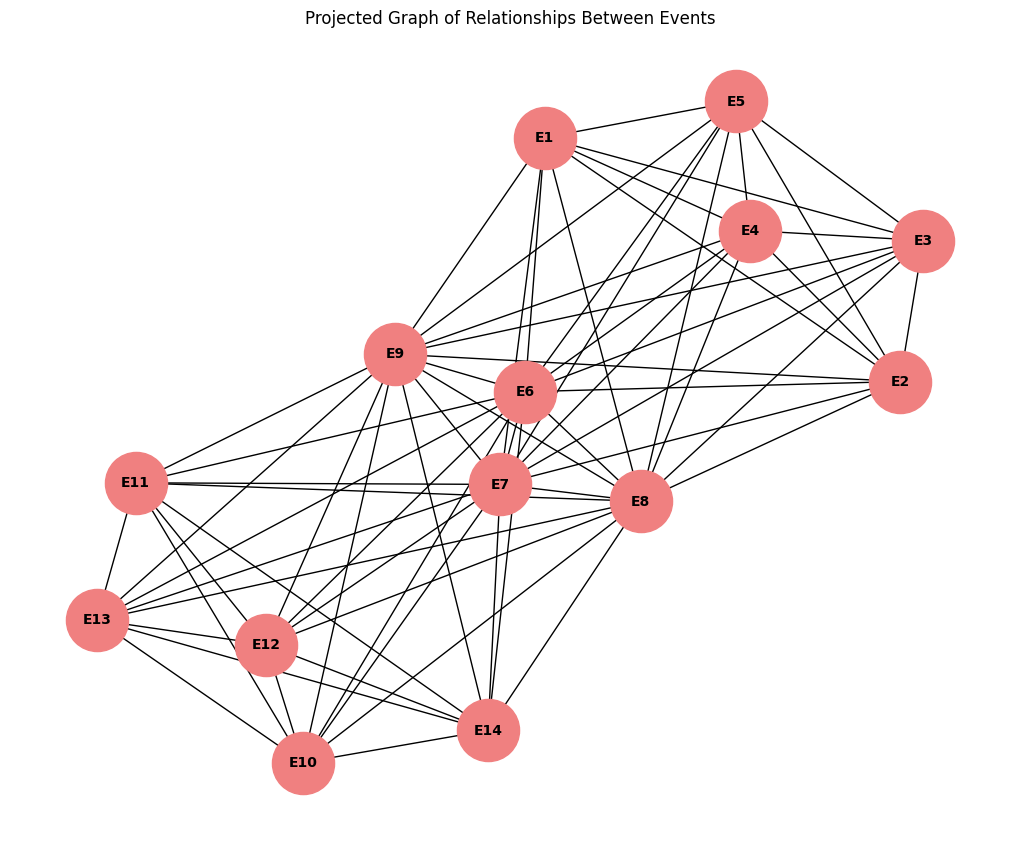

In [9]:
# Project the bipartite graph onto the event nodes
events_graph = nx.bipartite.projected_graph(G, events)

# Draw the projected graph
plt.figure(figsize=(10, 8))
nx.draw(events_graph, with_labels=True, node_color='lightcoral', node_size=2000, font_size=10, font_weight='bold')
plt.title("Projected Graph of Relationships Between Events")
plt.show()

#### Step 7: Calculating Centrality Measures
Centrality measures are used to identify the most important nodes in a network. In this step, we calculate degree centrality for both the women and the events. Degree centrality measures the number of connections a node has, which in this context indicates how many events a woman attended or how many women attended an event. By converting these centrality values into a pandas DataFrame, we can easily sort and analyze the results. This step helps us identify the most active women (those who attended the most events) and the most popular events (those attended by the most women).

In [10]:
# Calculate degree centrality for women
women_degree_centrality = nx.degree_centrality(women_graph)

# Calculate degree centrality for events
events_degree_centrality = nx.degree_centrality(events_graph)

# Convert to DataFrame for better visualization
women_centrality_df = pd.DataFrame(list(women_degree_centrality.items()), columns=['Woman', 'Degree Centrality'])
events_centrality_df = pd.DataFrame(list(events_degree_centrality.items()), columns=['Event', 'Degree Centrality'])

# Sort by Degree Centrality
women_centrality_df = women_centrality_df.sort_values(by='Degree Centrality', ascending=False)
events_centrality_df = events_centrality_df.sort_values(by='Degree Centrality', ascending=False)

print("Women Degree Centrality:")
print(women_centrality_df)

print("\nEvents Degree Centrality:")
print(events_centrality_df)



Women Degree Centrality:
                Woman  Degree Centrality
0     Sylvia Avondale           1.000000
10        Ruth DeSand           1.000000
2         Helen Lloyd           1.000000
3        Nora Fayette           1.000000
15   Evelyn Jefferson           1.000000
13    Verne Sanderson           1.000000
11   Theresa Anderson           1.000000
16   Katherina Rogers           0.941176
12   Pearl Oglethorpe           0.941176
17  Dorothy Murchison           0.941176
5         Myra Liddel           0.941176
1    Frances Anderson           0.882353
8       Brenda Rogers           0.882353
7    Laura Mandeville           0.882353
9         Eleanor Nye           0.882353
6     Olivia Carleton           0.705882
4         Flora Price           0.705882
14   Charlotte McDowd           0.647059

Events Degree Centrality:
   Event  Degree Centrality
1     E7           1.000000
2     E8           1.000000
3     E9           1.000000
13    E6           1.000000
0    E10           0.615385
4

##### Additional Centrality Measures (NEW)
Added betweenness and closeness centrality for both women and events.

In [15]:
# Calculate degree, betweenness, and closeness centrality for women
women_degree = nx.degree_centrality(women_graph)
women_betweenness = nx.betweenness_centrality(women_graph)
women_closeness = nx.closeness_centrality(women_graph)

# Calculate degree, betweenness, and closeness centrality for events
events_degree = nx.degree_centrality(events_graph)
events_betweenness = nx.betweenness_centrality(events_graph)
events_closeness = nx.closeness_centrality(events_graph)

# Convert to DataFrames for better visualization
women_centrality_df = pd.DataFrame({
    'Woman': list(women_degree.keys()),
    'Degree Centrality': list(women_degree.values()),
    'Betweenness Centrality': list(women_betweenness.values()),
    'Closeness Centrality': list(women_closeness.values())
}).sort_values(by='Degree Centrality', ascending=False)  # ✅ Fixed parenthesis

events_centrality_df = pd.DataFrame({
    'Event': list(events_degree.keys()),
    'Degree Centrality': list(events_degree.values()),
    'Betweenness Centrality': list(events_betweenness.values()),
    'Closeness Centrality': list(events_closeness.values())
}).sort_values(by='Degree Centrality', ascending=False)  # ✅ Fixed parenthesis

# Display results
print("Women Centrality Measures:")
print(women_centrality_df)

print("\nEvents Centrality Measures:")
print(events_centrality_df)


Women Centrality Measures:
                Woman  Degree Centrality  Betweenness Centrality  \
0     Sylvia Avondale           1.000000                0.010122   
10        Ruth DeSand           1.000000                0.010122   
2         Helen Lloyd           1.000000                0.010122   
3        Nora Fayette           1.000000                0.010122   
15   Evelyn Jefferson           1.000000                0.010122   
13    Verne Sanderson           1.000000                0.010122   
11   Theresa Anderson           1.000000                0.010122   
16   Katherina Rogers           0.941176                0.005348   
12   Pearl Oglethorpe           0.941176                0.005348   
17  Dorothy Murchison           0.941176                0.005348   
5         Myra Liddel           0.941176                0.005348   
1    Frances Anderson           0.882353                0.002674   
8       Brenda Rogers           0.882353                0.002674   
7    Laura Mandeville

#### Step 8: Community Detection
Community detection is a technique used to identify groups of nodes that are more densely connected to each other than to the rest of the network. In this step, we apply the greedy modularity maximization algorithm to the women’s projected graph to detect communities. These communities represent groups of women who tend to attend the same events, suggesting the presence of social circles or cliques. By analyzing these communities, we can gain deeper insights into the social dynamics of the group and identify potential subgroups within the network.

In [11]:
from networkx.algorithms import community

# Detect communities using the greedy modularity maximization
communities = list(community.greedy_modularity_communities(women_graph))

# Print the communities
for i, com in enumerate(communities):
    print(f"Community {i+1}: {com}")


Community 1: frozenset({'Sylvia Avondale', 'Helen Lloyd', 'Nora Fayette', 'Flora Price', 'Myra Liddel', 'Olivia Carleton', 'Ruth DeSand', 'Theresa Anderson', 'Pearl Oglethorpe', 'Evelyn Jefferson', 'Katherina Rogers', 'Dorothy Murchison'})
Community 2: frozenset({'Brenda Rogers', 'Laura Mandeville', 'Eleanor Nye', 'Frances Anderson', 'Verne Sanderson', 'Charlotte McDowd'})


Added density and clustering coefficient to evaluate the network structure.(NEW)

In [16]:
# Basic network statistics
women_density = nx.density(women_graph)
events_density = nx.density(events_graph)

women_clustering = nx.average_clustering(women_graph)
events_clustering = nx.average_clustering(events_graph)

print(f"Women Network Density: {women_density}")
print(f"Women Network Clustering Coefficient: {women_clustering}\n")

print(f"Events Network Density: {events_density}")
print(f"Events Network Clustering Coefficient: {events_clustering}")


Women Network Density: 0.9084967320261438
Women Network Clustering Coefficient: 0.9366868969810146

Events Network Density: 0.7252747252747253
Events Network Clustering Coefficient: 0.9084249084249084


##### Community Detection (Extended)
Instead of only using greedy modularity, added Label Propagation as another method.

In [18]:
# Greedy modularity maximization
greedy_communities = list(community.greedy_modularity_communities(women_graph))

# Label Propagation community detection
label_communities = list(community.asyn_lpa_communities(women_graph))

# Print detected communities
print("Greedy Modularity Communities:")
for i, com in enumerate(greedy_communities):
    print(f"Community {i+1}: {com}")

print("\nLabel Propagation Communities:")
for i, com in enumerate(label_communities):
    print(f"Community {i+1}: {com}")


Greedy Modularity Communities:
Community 1: frozenset({'Sylvia Avondale', 'Helen Lloyd', 'Nora Fayette', 'Flora Price', 'Myra Liddel', 'Olivia Carleton', 'Ruth DeSand', 'Theresa Anderson', 'Pearl Oglethorpe', 'Evelyn Jefferson', 'Katherina Rogers', 'Dorothy Murchison'})
Community 2: frozenset({'Brenda Rogers', 'Laura Mandeville', 'Eleanor Nye', 'Frances Anderson', 'Verne Sanderson', 'Charlotte McDowd'})

Label Propagation Communities:
Community 1: {'Sylvia Avondale', 'Charlotte McDowd', 'Frances Anderson', 'Helen Lloyd', 'Flora Price', 'Nora Fayette', 'Myra Liddel', 'Olivia Carleton', 'Laura Mandeville', 'Brenda Rogers', 'Eleanor Nye', 'Ruth DeSand', 'Theresa Anderson', 'Pearl Oglethorpe', 'Verne Sanderson', 'Evelyn Jefferson', 'Katherina Rogers', 'Dorothy Murchison'}


#### Step 9: Conclusion
The analysis provides a comprehensive understanding of the relationships between the Southern women and the social events they attended. By visualizing the bipartite graph and its projections, we can see how women and events are connected. Calculating centrality measures helps us identify the most influential women and events, while community detection reveals natural groupings within the network. These insights can be used to infer social structures, such as friendships, cliques, and event popularity, offering a deeper understanding of the dataset.